In [190]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [191]:
from pathlib import Path

import pandas as pd
import numpy as np
from numpy import mean
from numpy import std

import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [192]:
pd.set_option('display.max_columns', None)

In [194]:
def load_raw_data(file):
    filePath = Path('C:\\Temp\\MRes\\training_data', file)
    data = pd.read_csv(filePath)
    return data

def feature_target(data):
    #data = data.drop(columns=['geometry'])
    X, y = data.iloc[:,1:], data['GENUS']
    return(X, y)

def hyperparameter_tuning(estimator, param_grid, X_train, y_train):
    CV = GridSearchCV(estimator = estimator, param_grid = param_grid, cv= 5, verbose=10, n_jobs=-1)
    CV.fit(X_train, y_train)
    print(CV.best_params_)

def train_SVM( X_train, y_train):
    model = SVC(C=10, kernel='rbf')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return model, y_pred

def train_RF(X_train, y_train):
    model = RandomForestClassifier(n_estimators=100, max_features='auto', max_depth=7)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return model, y_pred

def train_AB(X_train, y_train):
    model = AdaBoostClassifier(n_estimators=200, learning_rate=0.05)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return model, y_pred

def print_metrics(y_test, y_pred, X_test, model):
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
    print('F1:', metrics.f1_score(y_test, y_pred, average='weighted'))
    print('Precision:', metrics.precision_score(y_test, y_pred, average='weighted'))
    print('Recall:', metrics.precision_score(y_test, y_pred, average='weighted'))

def conf_matrix(model, X_test, y_test, file):
    fig, ax = plt.subplots(figsize=(7, 7))
    disp = plot_confusion_matrix(model, X_test, y_test, ax=ax, cmap='Blues', normalize='true')
    disp.im_.set_clim(0,1)
    filePath = Path('C:\\Temp\\MRes\\Figures', file)
    plt.savefig(filePath, bbox_inches='tight')
    plt.show()
    
def feature_importance_rank(model, model_name, file):
    fig, ax = plt.subplots(figsize=(10, 7))
    skplt.estimators.plot_feature_importances(model, feature_names = col_heads, title=model_name, max_num_features = 10, ax=ax)
    ax.set_ylabel('Importance')
    plt.xticks(rotation=45, ha="right")
    filePath = Path('C:\\Temp\\MRes\\Figures', file)
    plt.savefig(filePath, bbox_inches='tight')
    plt.show()
    
def output_performance_report(y_test, y_pred, file):
    report = classification_report(y_test, y_pred, output_dict=True)
    df = pd.DataFrame(report).transpose()
    filePath = Path('C:\\Temp\\MRes\\tree_class_results', file)
    df.to_csv(filePath)

In [72]:
# Parameter grids

param_grid_rf = { 
    'n_estimators': [10, 100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
}

param_grid_sv = { 
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['poly', 'rbf'],
    #'gamma' : ['scale', 'auto'],
}

param_grid_ada = { 
    'n_estimators': [10, 100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
}

# Classifiers

rfc = RandomForestClassifier(random_state=42)
sv = SVC(random_state=42)
ada = AdaBoostClassifier(random_state=42)

In [6]:
import matplotlib
matplotlib.rcParams.update({'font.size': 12})

In [195]:
# Load the dataset
data = load_raw_data('geometric_features.csv')

# Split the data into features (X) and target (y)
X, y = feature_target(data)
col_heads = list(X.columns.values.tolist())

# Split the training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [ ]:
hyperparameter_tuning(ada, param_grid_ada, X_train, y_train)

In [80]:
hyperparameter_tuning(rfc, param_grid_rf, X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   

{'max_depth': 4, 'max_features': 'log2', 'n_estimators': 100}


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   16.2s finished


In [75]:
hyperparameter_tuning(sv, param_grid_sv, X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0323s.) Setting batch_size=12.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of  50 | elapsed:    0.0s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  11 out of  50 | elapsed:    0.0s remaining:    0.2s


{'C': 1000, 'kernel': 'poly'}


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.7s finished


In [ ]:
# Select best parameters for each algorithm

hyperparameter_tuning(sv, param_grid_sv, X_train, y_train)

hyperparameter_tuning(rfc, param_grid_rf, X_train, y_train)

hyperparameter_tuning(ada, param_grid_ada, X_train, y_train)

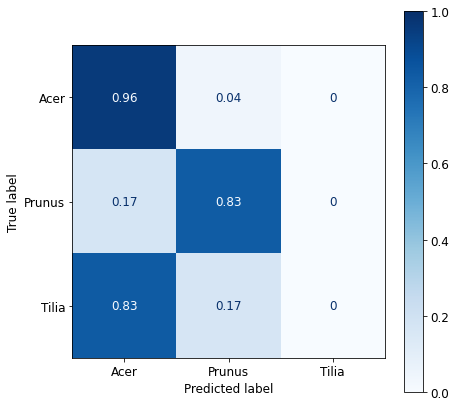

In [159]:
# Support Vector Machines

model, y_pred = train_SVM(X_train, y_train)

#print_metrics(y_test, y_pred, X_test, model)

conf_matrix(model, X_test, y_test, 'SVM_3cat_norm.png')

#output_performance_report(y_test, y_pred, 'SVM_6cat_50balanced.csv')

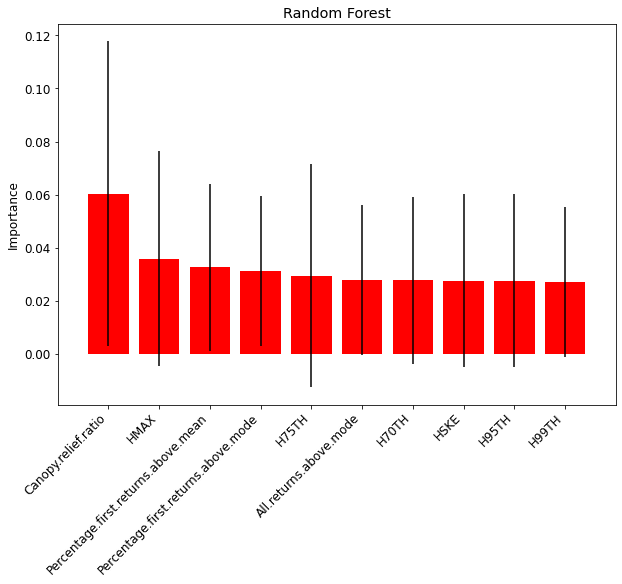

In [197]:
# Random Forest

model, y_pred = train_RF(X_train, y_train)

#print_metrics(y_test, y_pred, X_test, model)

#conf_matrix(model, X_test, y_test, 'RF_3cat_norm.png')

feature_importance_rank(model, 'Random Forest', 'RF_geometric_feature_rank.png')

#output_performance_report(y_test, y_pred, 'RF_6cat_50balanced.csv')

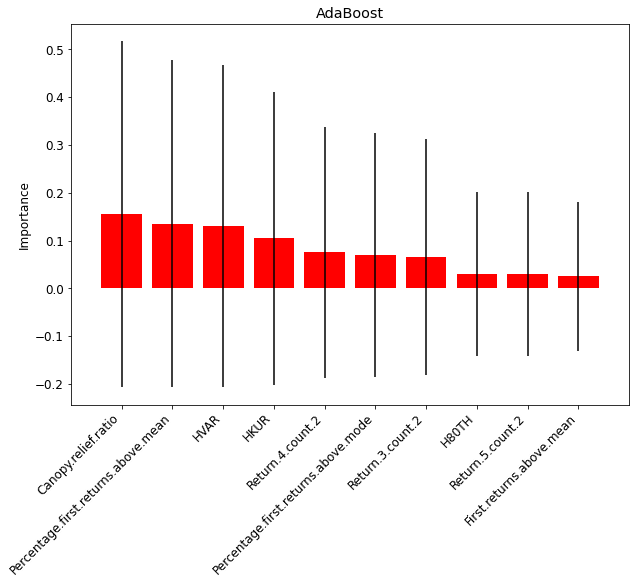

In [201]:
# AdaBoost

model, y_pred = train_AB(X_train, y_train)

#print_metrics(y_test, y_pred, X_test, model)

#conf_matrix(model, X_test, y_test,'AB_3cat_norm.png')

feature_importance_rank(model, 'AdaBoost', 'AB_geometric_feature_rank.png')

#output_performance_report(y_test, y_pred, 'AB_6_cat_50balanced.csv')